In [1]:
import pandas as pd

In [2]:
## KAGGLE

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
# train = pd.read_csv('../input/sentimen-restoran/preprocessed_train.csv')
# test = pd.read_csv('../input/sentimen-restoran/preprocessed_test.csv')

In [4]:
train = pd.read_csv('data/preprocessed_train.csv')
test = pd.read_csv('data/preprocessed_test.csv')

In [5]:
sentiment_to_id = {'positive': 1, 'negative': 0}
id_to_sentiment = {1: 'positive', 0: 'negative'}

In [6]:
train.head()

text  sentiment  \
0  Saya makan di sini dengan menggunakan voucher ...          0   
1  Mas indosat buat main game enemy has been slai...          0   
2  Trus sy percuma dong update no hp terbaru ke c...          0   
3  jika kita pilih dia maka akan ada lebih dari 3...          0   
4  Dikarenakan adik saya suka dengan restoran ini...          0   

                                        cleaned_text  \
0  saya makan di sini dengan menggunakan voucher ...   
1  mas indosat buat main game enemy has been slai...   
2  terus saya percuma dong update nomor hp terbar...   
3  jika kita pilih dia maka akan ada lebih dari k...   
4  dikarenakan adik saya suka dengan restoran ini...   

                                    barasa_senti_val  barasa_total_pos_word  \
0  [('saya', [0.0, 0.0]), ('makan', [0.0410714285...                     19   
1  [('mas', [0.0, 0.0625]), ('buat', [0.0, 0.0]),...                      7   
2  [('terus', [0.06, 0.045]), ('saya', [0.0, 0.0]...                      6   
3  [('jika', [0.0, 0.0]), ('kita', [0.0, 0.0]), (...                      4   
4  [('adik', [0.0, 0.0]), ('saya', [0.0, 0.0]), (...                     21   

   barasa_total_neg_word  barasa_mean_pos_sentiment_val  \
0                     19                       0.078069   
1                     11                       0.095732   
2                      5                       0.087889   
3                      4                       0.040634   
4                     26                       0.119401   

   barasa_mean_neg_sentiment_val  \
0                       0.149732   
1                       0.136639   
2                       0.104795   
3                       0.085928   
4                       0.149148   

                                          translated  \
0  I eat here using the disdus voucher for the cu...   
1  Sir, Indosat for playing the game, the enemy h...   
2  then I am useless, please update the latest ce...   
3  if we choose him then there will be more than ...   
4  because my sister likes this restaurant, I fin...   

                                     trans_senti_val  trans_total_pos_word  \
0  [('eat', [0.041666666666666664, 0.0]), ('here'...                    18   
1  [('Sir', [0.0, 0.0]), ('playing', [0.039285714...                     8   
2  [('then', [0.0, 0.0]), ('am', [0.0288461538461...                    10   
3  [('choose', [0.0, 0.0]), ('then', [0.0, 0.0]),...                     2   
4  [('sister', [0.03125, 0.03125]), ('likes', [0....                    24   

   trans_total_neg_word  trans_mean_pos_sentiment_val  \
0                    14                      0.049165   
1                    12                      0.102066   
2                     9                      0.068739   
3                     3                      0.028846   
4                    27                      0.094519   

   trans_mean_neg_sentiment_val  
0                      0.075428  
1                      0.133502  
2                      0.129534  
3                      0.096154  
4                      0.077969

### Feature Selection

In [7]:
X_train = train['cleaned_text']

X_train_sent_barasa = train[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val']]

# X_train_text_sent_barasa = X_train_sent_barasa.copy() + BOW vector of cleaned text

X_train_sent_trans = train[['trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]

# X_train_text_sent_trans = X_train_sent_trans.copy()+ BOW vector of cleaned text

y_train = train['sentiment']

In [8]:
X_test = test['cleaned_text']

X_test_sent_barasa = test[['barasa_total_pos_word', 'barasa_total_neg_word', \
                            'barasa_mean_pos_sentiment_val', 'barasa_mean_neg_sentiment_val']]

# X_test_text_sent_barasa = X_test_sent_barasa.copy() + BOW vector of cleaned text

X_test_sent_trans = test[['trans_total_pos_word', 'trans_total_neg_word', \
                            'trans_mean_pos_sentiment_val', 'trans_mean_neg_sentiment_val']]

# X_test_text_sent_trans = X_test_sent_trans.copy()+ BOW vector of cleaned text

y_test = test['sentiment']

### BOW using CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# # instantiate the vectorizer
vect = CountVectorizer()

In [11]:
train_vect = vect.fit_transform(train['cleaned_text']).toarray()

In [12]:
train_vect.shape

(1780, 6604)

In [13]:
test_vect = vect.transform(test['cleaned_text']).toarray()

In [14]:
import numpy as np

In [15]:
X_train = train_vect
X_train_text_sent_barasa = np.concatenate((train_vect, X_train_sent_barasa), axis=1)
X_train_text_sent_trans = np.concatenate((train_vect, X_train_sent_trans), axis=1)

X_test = test_vect
X_test_text_sent_barasa = np.concatenate((test_vect, X_test_sent_barasa), axis=1)
X_test_text_sent_trans = np.concatenate((test_vect, X_test_sent_trans), axis=1)

### Train

In [16]:
# Library for Deep Learning
from keras import backend as K

Using TensorFlow backend.


In [17]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### set random seed

In [18]:
import tensorflow as tf

In [19]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [20]:
import random
import numpy as np

#### 1. Base Model (using cleaned_text only)

In [21]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [22]:
X_train.shape

(1780, 6604)

In [23]:
type(X_train)

numpy.ndarray

In [24]:
# Reshaping X_train & X_test
X_train = X_train[:, :, None]
X_test = X_test[:, :, None]

In [25]:
X_train.shape

(1780, 6604, 1)

In [26]:
base_model = Sequential()
base_model.add(LSTM(10, dropout=0.2, input_shape=X_train.shape[1:]))
base_model.add(layers.Dense(8, activation='relu'))
base_model.add(Dropout(0.2))
base_model.add(layers.Dense(1, activation='sigmoid'))

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [27]:
base_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [28]:
EPOCHS = 10
BATCH_SIZE = 1024

history = base_model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1246 samples, validate on 534 samples
Epoch 1/10
1246/1246 [==============================] - 21s 17ms/step - loss: 0.6931 - accuracy: 0.4960 - f1_m: 0.5968 - val_loss: 0.6886 - val_accuracy: 1.0000 - val_f1_m: 1.0000
Epoch 2/10
1246/1246 [==============================] - 26s 21ms/step - loss: 0.6928 - accuracy: 0.5361 - f1_m: 0.6898 - val_loss: 0.6842 - val_accuracy: 1.0000 - val_f1_m: 1.0000
Epoch 3/10
1246/1246 [==============================] - 28s 22ms/step - loss: 0.6924 - accuracy: 0.5345 - f1_m: 0.6953 - val_loss: 0.6797 - val_accuracy: 1.0000 - val_f1_m: 1.0000
Epoch 4/10
1246/1246 [==============================] - 22s 18ms/step - loss: 0.6922 - accuracy: 0.5353 - f1_m: 0.6989 - val_loss: 0.6749 - val_accuracy: 1.0000 - val_f1_m: 1.0000
Epoch 5/10
1246/1246 [==============================] - 23s 19ms/step - loss: 0.6921 - accuracy: 0.5353 - f1_m: 0.6944 - val_loss: 0.6702 - val_accuracy: 1.0000 - val_f1_m: 1.0000
Epoch 6/10
1246/1246 [==============================]

In [29]:
def save_model(model, FILE_NAME):
    # serialize model to YAML
    model_yaml = model.to_yaml()
    with open(FILE_NAME +'.yaml', "w") as yaml_file:
        yaml_file.write(model_yaml)
    # serialize weights to HDF5
    model.save_weights(FILE_NAME +'.h5')
    print("Saved model to disk")

In [30]:
save_model(base_model, 'model/LSTM bow_base')

Saved model to disk


In [31]:
history.history

{'val_loss': [0.688575804233551,
  0.6842202544212341,
  0.6796993017196655,
  0.6749492883682251,
  0.6702210903167725,
  0.6654038429260254,
  0.6605239510536194,
  0.6556265354156494,
  0.6515941619873047,
  0.6482477188110352],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_f1_m': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.6931101361208896,
  0.6927788751274586,
  0.6924241587017359,
  0.6922041242807673,
  0.692107371304238,
  0.6915422473252298,
  0.6913469037695834,
  0.6910668445054448,
  0.6918564418728432,
  0.6910769072619908],
 'accuracy': [0.49598715,
  0.5361156,
  0.53451043,
  0.535313,
  0.535313,
  0.5361156,
  0.5361156,
  0.5361156,
  0.535313,
  0.5361156],
 'f1_m': [0.5967946,
  0.68979454,
  0.69527304,
  0.69886947,
  0.6943693,
  0.70056796,
  0.7187468,
  0.6915323,
  0.68820167,
  0.69306797]}

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

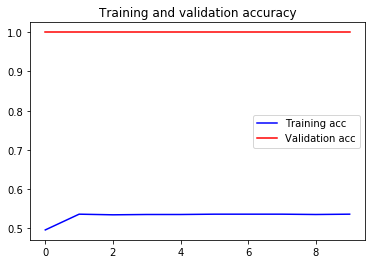

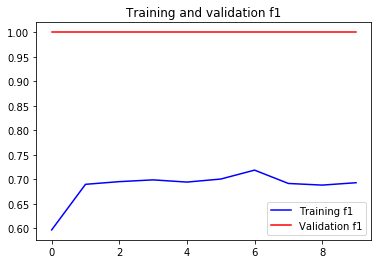

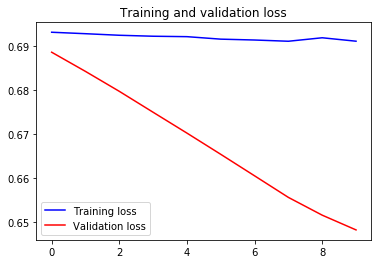

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [34]:
score = base_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 5ms/step

f1: 0.786885142326355
accuracy: 0.6486486196517944
LOSS: 0.6805234551429749


In [35]:
# predict probabilities for val set
y_pred_probs = base_model.predict(X_test, verbose=0)
# predict crisp classes for val set
y_pred = base_model.predict_classes(X_test, verbose=0)

In [36]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [37]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [39]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.648649
Precision: 0.648649
Recall: 1.000000
F1 score: 0.786885
Kappa score: 0.000000


In [40]:
from sklearn.metrics import confusion_matrix

Text(0.5, 15.0, 'Predicted')

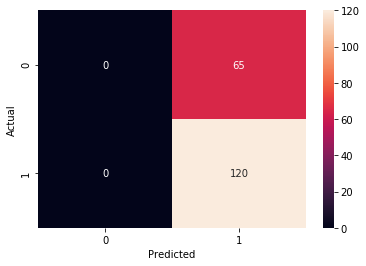

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 2. Barasa Sentiment Model

In [42]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [43]:
X_train_sent_barasa.shape

(1780, 4)

In [44]:
type(X_train_sent_barasa)

pandas.core.frame.DataFrame

In [45]:
X_train_sent_barasa = X_train_sent_barasa.to_numpy()
X_test_sent_barasa = X_test_sent_barasa.to_numpy()

In [46]:
type(X_train_sent_barasa)

numpy.ndarray

In [47]:
X_train_sent_barasa.shape

(1780, 4)

In [48]:
# Reshaping X_train & X_test
X_train_sent_barasa = X_train_sent_barasa[:, :, None]
X_test_sent_barasa = X_test_sent_barasa[:, :, None]

In [49]:
X_train_sent_barasa.shape

(1780, 4, 1)

In [50]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_sent_barasa.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [52]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_sent_barasa, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1246 samples, validate on 534 samples
Epoch 1/10
1246/1246 [==============================] - 3s 3ms/step - loss: 0.7094 - accuracy: 0.4743 - f1_m: 0.3381 - val_loss: 0.8251 - val_accuracy: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/10
1246/1246 [==============================] - 0s 32us/step - loss: 0.7117 - accuracy: 0.4711 - f1_m: 0.3701 - val_loss: 0.8118 - val_accuracy: 0.0019 - val_f1_m: 0.0037
Epoch 3/10
1246/1246 [==============================] - 0s 23us/step - loss: 0.7040 - accuracy: 0.5008 - f1_m: 0.4379 - val_loss: 0.7990 - val_accuracy: 0.0019 - val_f1_m: 0.0037
Epoch 4/10
1246/1246 [==============================] - 0s 41us/step - loss: 0.7053 - accuracy: 0.4815 - f1_m: 0.4165 - val_loss: 0.7867 - val_accuracy: 0.0019 - val_f1_m: 0.0037
Epoch 5/10
1246/1246 [==============================] - 0s 22us/step - loss: 0.7027 - accuracy: 0.4904 - f1_m: 0.4129 - val_loss: 0.7748 - val_accuracy: 0.0037 - val_f1_m: 0.0075
Epoch 6/10
1246/1246 [=============================

In [53]:
save_model(model, 'model/LSTM bow_sent_barasa')

Saved model to disk


In [54]:
history.history

{'val_loss': [0.8250672817230225,
  0.8118210434913635,
  0.7990142107009888,
  0.7867245078086853,
  0.7747538089752197,
  0.7632716298103333,
  0.7521864771842957,
  0.741377592086792,
  0.7312285304069519,
  0.7217246294021606],
 'val_accuracy': [0.0,
  0.00187265919521451,
  0.00187265919521451,
  0.00187265919521451,
  0.00374531839042902,
  0.00749063678085804,
  0.01123595517128706,
  0.020599251613020897,
  0.04494382068514824,
  0.06928838789463043],
 'val_f1_m': [0.0,
  0.0037383174058049917,
  0.0037383174058049917,
  0.0037383174058049917,
  0.00746268592774868,
  0.014869886450469494,
  0.02222221903502941,
  0.040366970002651215,
  0.08602149784564972,
  0.12959718704223633],
 'loss': [0.7093859702396546,
  0.7116795614672702,
  0.70402872017069,
  0.7053488312142618,
  0.7026668469366254,
  0.7001089551284263,
  0.6991784079882345,
  0.6985937898461355,
  0.6971477903485489,
  0.6987369869914904],
 'accuracy': [0.47431782,
  0.47110754,
  0.5008026,
  0.48154092,
  0.490

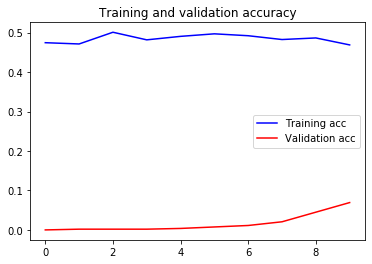

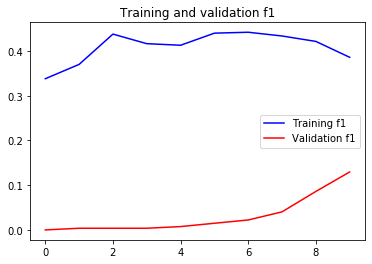

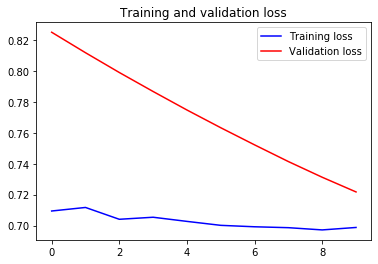

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [56]:
score = model.evaluate(X_test_sent_barasa, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 0s 36us/step

f1: 0.0937499850988388
accuracy: 0.3729729652404785
LOSS: 0.6991853713989258


In [57]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_sent_barasa, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_sent_barasa, verbose=0)

In [58]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [59]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [60]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.372973
Precision: 0.750000
Recall: 0.050000
F1 score: 0.093750
Kappa score: 0.013787


Text(0.5, 15.0, 'Predicted')

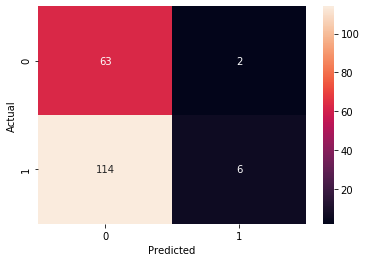

In [61]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 3. Barasa Sentiment Model + Cleaned Text

In [62]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [63]:
X_train_text_sent_barasa.shape

(1780, 6608)

In [64]:
type(X_train_text_sent_barasa)

numpy.ndarray

In [65]:
# Reshaping X_train & X_test
X_train_text_sent_barasa = X_train_text_sent_barasa[:, :, None]
X_test_text_sent_barasa = X_test_text_sent_barasa[:, :, None]

In [66]:
X_train_text_sent_barasa.shape

(1780, 6608, 1)

In [67]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_text_sent_barasa.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [69]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_text_sent_barasa, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1246 samples, validate on 534 samples
Epoch 1/10
1246/1246 [==============================] - 31s 25ms/step - loss: 0.7093 - accuracy: 0.4743 - f1_m: 0.3381 - val_loss: 0.8242 - val_accuracy: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/10
1246/1246 [==============================] - 30s 24ms/step - loss: 0.7115 - accuracy: 0.4711 - f1_m: 0.3701 - val_loss: 0.8108 - val_accuracy: 0.0019 - val_f1_m: 0.0037
Epoch 3/10
1246/1246 [==============================] - 34s 27ms/step - loss: 0.7038 - accuracy: 0.5008 - f1_m: 0.4379 - val_loss: 0.7975 - val_accuracy: 0.0019 - val_f1_m: 0.0037
Epoch 4/10
1246/1246 [==============================] - 33s 26ms/step - loss: 0.7051 - accuracy: 0.4815 - f1_m: 0.4165 - val_loss: 0.7845 - val_accuracy: 0.0019 - val_f1_m: 0.0037
Epoch 5/10
1246/1246 [==============================] - 28s 23ms/step - loss: 0.7023 - accuracy: 0.4904 - f1_m: 0.4129 - val_loss: 0.7719 - val_accuracy: 0.0037 - val_f1_m: 0.0075
Epoch 6/10
1246/1246 [=======================

In [70]:
save_model(model, 'model/LSTM bow_text_sent_barasa')

Saved model to disk


In [71]:
history.history

{'val_loss': [0.8241770267486572,
  0.8108459711074829,
  0.7975499629974365,
  0.7844586968421936,
  0.7718572020530701,
  0.7597760558128357,
  0.7481020092964172,
  0.7367385029792786,
  0.7260431051254272,
  0.7160447239875793],
 'val_accuracy': [0.0,
  0.00187265919521451,
  0.00187265919521451,
  0.00187265919521451,
  0.00374531839042902,
  0.009363295510411263,
  0.013108613900840282,
  0.03183520585298538,
  0.056179776787757874,
  0.11235955357551575],
 'val_f1_m': [0.0,
  0.0037383174058049917,
  0.0037383174058049917,
  0.0037383174058049917,
  0.00746268592774868,
  0.01855287328362465,
  0.025878001004457474,
  0.06170598044991493,
  0.10638297349214554,
  0.20202018320560455],
 'loss': [0.7093436250143219,
  0.7115209381997489,
  0.7038400515698697,
  0.7051027293763995,
  0.702339820551834,
  0.6997081336010708,
  0.6987363550674475,
  0.6980834877892826,
  0.6966611609987041,
  0.6981397995405365],
 'accuracy': [0.47431782,
  0.47110754,
  0.5008026,
  0.48154092,
  0.

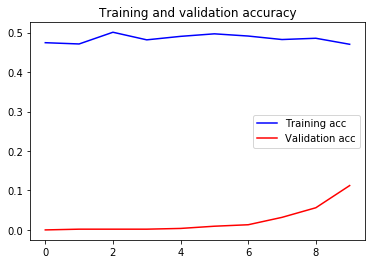

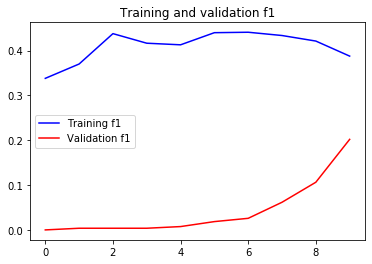

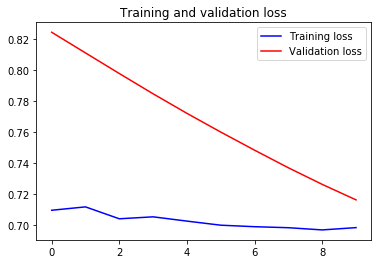

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [73]:
score = model.evaluate(X_test_text_sent_barasa, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 7ms/step

f1: 0.16417907178401947
accuracy: 0.39459457993507385
LOSS: 0.6974087357521057


In [74]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_text_sent_barasa, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_text_sent_barasa, verbose=0)

In [75]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [76]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [77]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.394595
Precision: 0.785714
Recall: 0.091667
F1 score: 0.164179
Kappa score: 0.033131


Text(0.5, 15.0, 'Predicted')

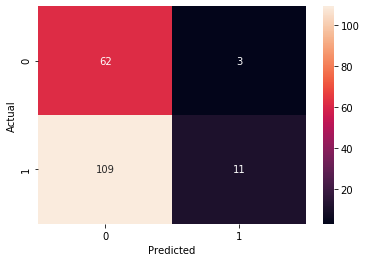

In [78]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 4. Trans Sentiment Model

In [79]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [80]:
X_train_sent_trans.shape

(1780, 4)

In [81]:
type(X_train_sent_trans)

pandas.core.frame.DataFrame

In [82]:
X_train_sent_trans = X_train_sent_trans.to_numpy()
X_test_sent_trans = X_test_sent_trans.to_numpy()

In [83]:
type(X_train_sent_trans)

numpy.ndarray

In [84]:
X_train_sent_trans.shape

(1780, 4)

In [85]:
# Reshaping X_train & X_test
X_train_sent_trans = X_train_sent_trans[:, :, None]
X_test_sent_trans = X_test_sent_trans[:, :, None]

In [86]:
X_train_sent_trans.shape

(1780, 4, 1)

In [87]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_sent_trans.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [89]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_sent_trans, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1246 samples, validate on 534 samples
Epoch 1/10
1246/1246 [==============================] - 2s 2ms/step - loss: 0.7061 - accuracy: 0.4727 - f1_m: 0.3389 - val_loss: 0.7907 - val_accuracy: 0.0431 - val_f1_m: 0.0826
Epoch 2/10
1246/1246 [==============================] - 0s 76us/step - loss: 0.7075 - accuracy: 0.4864 - f1_m: 0.4002 - val_loss: 0.7793 - val_accuracy: 0.1011 - val_f1_m: 0.1837
Epoch 3/10
1246/1246 [==============================] - 0s 19us/step - loss: 0.7013 - accuracy: 0.5128 - f1_m: 0.4827 - val_loss: 0.7684 - val_accuracy: 0.1685 - val_f1_m: 0.2885
Epoch 4/10
1246/1246 [==============================] - 0s 18us/step - loss: 0.7032 - accuracy: 0.4968 - f1_m: 0.4755 - val_loss: 0.7577 - val_accuracy: 0.2097 - val_f1_m: 0.3467
Epoch 5/10
1246/1246 [==============================] - 0s 16us/step - loss: 0.6995 - accuracy: 0.5096 - f1_m: 0.4725 - val_loss: 0.7473 - val_accuracy: 0.2416 - val_f1_m: 0.3891
Epoch 6/10
1246/1246 [==============================] - 0s 

In [90]:
save_model(model, 'model/LSTM bow_sent_trans')

Saved model to disk


In [91]:
history.history

{'val_loss': [0.7907148599624634,
  0.779347836971283,
  0.76838219165802,
  0.7576606273651123,
  0.7473442554473877,
  0.7375138998031616,
  0.7281067967414856,
  0.7189736366271973,
  0.7106282711029053,
  0.7029857039451599],
 'val_accuracy': [0.043071161955595016,
  0.10112359374761581,
  0.16853933036327362,
  0.20973782241344452,
  0.2415730357170105,
  0.26404494047164917,
  0.29400748014450073,
  0.32022473216056824,
  0.3314606845378876,
  0.3426966369152069],
 'val_f1_m': [0.08258526772260666,
  0.1836734563112259,
  0.2884615361690521,
  0.3467491865158081,
  0.389140248298645,
  0.41777774691581726,
  0.45441386103630066,
  0.48510634899139404,
  0.49789026379585266,
  0.5104601979255676],
 'loss': [0.7060928594434625,
  0.707460585987587,
  0.7012785310538584,
  0.7032321688642854,
  0.6994665872610591,
  0.6987022741265703,
  0.6986883212819719,
  0.6977002068660424,
  0.6956804005330486,
  0.6989657276132134],
 'accuracy': [0.47271267,
  0.48635635,
  0.5128411,
  0.496

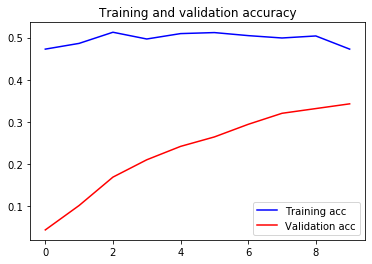

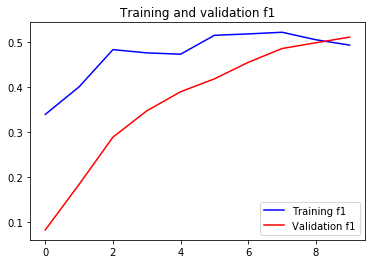

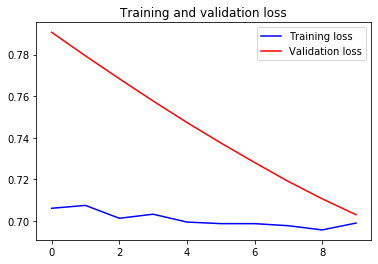

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [93]:
score = model.evaluate(X_test_sent_trans, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 0s 9us/step

f1: 0.31578946113586426
accuracy: 0.4378378391265869
LOSS: 0.6970793008804321


In [94]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_sent_trans, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_sent_trans, verbose=0)

In [95]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [96]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [97]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.437838
Precision: 0.750000
Recall: 0.200000
F1 score: 0.315789
Kappa score: 0.058708


Text(0.5, 15.0, 'Predicted')

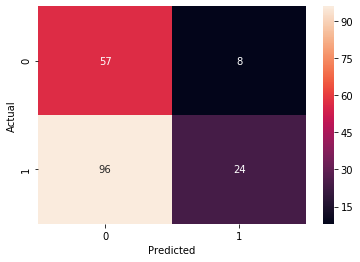

In [98]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### 5. Trans Sentiment Model + Cleaned Text

In [99]:
seed_value = 1
num = 38

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set tensorflow random seed
tf.random.set_seed(num)

In [100]:
X_train_text_sent_trans.shape

(1780, 6608)

In [101]:
type(X_train_text_sent_trans)

numpy.ndarray

In [102]:
# Reshaping X_train & X_test
X_train_text_sent_trans = X_train_text_sent_trans[:, :, None]
X_test_text_sent_trans = X_test_text_sent_trans[:, :, None]

In [103]:
X_train_text_sent_barasa.shape

(1780, 6608, 1)

In [104]:
model = Sequential()
model.add(LSTM(10, dropout=0.2, input_shape=X_train_text_sent_trans.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy', f1_m])

In [106]:
EPOCHS = 10
BATCH_SIZE = 1024

history = model.fit(X_train_text_sent_trans, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.3,
                    verbose=1)

Train on 1246 samples, validate on 534 samples
Epoch 1/10
1246/1246 [==============================] - 28s 23ms/step - loss: 0.7061 - accuracy: 0.4743 - f1_m: 0.3415 - val_loss: 0.7906 - val_accuracy: 0.0431 - val_f1_m: 0.0826
Epoch 2/10
1246/1246 [==============================] - 30s 24ms/step - loss: 0.7074 - accuracy: 0.4864 - f1_m: 0.4002 - val_loss: 0.7794 - val_accuracy: 0.1067 - val_f1_m: 0.1929
Epoch 3/10
1246/1246 [==============================] - 39s 32ms/step - loss: 0.7013 - accuracy: 0.5136 - f1_m: 0.4867 - val_loss: 0.7681 - val_accuracy: 0.1685 - val_f1_m: 0.2885
Epoch 4/10
1246/1246 [==============================] - 35s 28ms/step - loss: 0.7032 - accuracy: 0.4960 - f1_m: 0.4758 - val_loss: 0.7569 - val_accuracy: 0.2116 - val_f1_m: 0.3493
Epoch 5/10
1246/1246 [==============================] - 34s 27ms/step - loss: 0.6994 - accuracy: 0.5120 - f1_m: 0.4806 - val_loss: 0.7461 - val_accuracy: 0.2472 - val_f1_m: 0.3964
Epoch 6/10
1246/1246 [==============================]

In [107]:
save_model(model, 'model/LSTM bow_text_sent_trans')

Saved model to disk


In [108]:
history.history

{'val_loss': [0.7906343340873718,
  0.7794120907783508,
  0.768074095249176,
  0.7568552494049072,
  0.746058464050293,
  0.7357114553451538,
  0.7257194519042969,
  0.7161397337913513,
  0.7074193954467773,
  0.6993952393531799],
 'val_accuracy': [0.043071161955595016,
  0.10674156993627548,
  0.16853933036327362,
  0.21161048114299774,
  0.24719101190567017,
  0.2677902579307556,
  0.2996254563331604,
  0.3258427083492279,
  0.33707866072654724,
  0.35393258929252625],
 'val_f1_m': [0.08258526772260666,
  0.192893385887146,
  0.2884615361690521,
  0.3493044674396515,
  0.39639633893966675,
  0.4224519729614258,
  0.46109503507614136,
  0.4915253818035126,
  0.5042016506195068,
  0.5228215456008911],
 'loss': [0.7060516972220345,
  0.7074493262587925,
  0.7012789774668159,
  0.7032089204696361,
  0.6993551130853534,
  0.698540936025341,
  0.6984736614204333,
  0.697474088753016,
  0.6954956802854951,
  0.6986391138686031],
 'accuracy': [0.47431782,
  0.48635635,
  0.5136437,
  0.49598

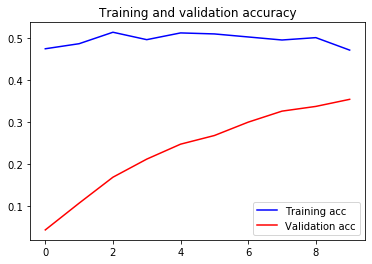

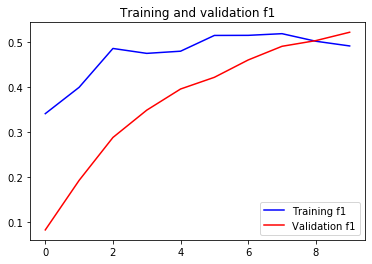

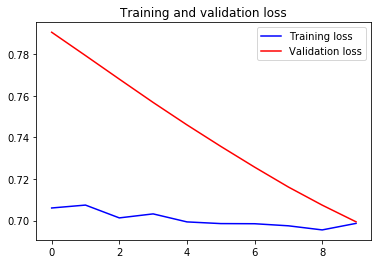

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, f1, 'b', label='Training f1')
plt.plot(epochs, val_f1, 'r', label='Validation f1')
plt.title('Training and validation f1')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [110]:
score = model.evaluate(X_test_text_sent_trans, y_test, batch_size=BATCH_SIZE)
print()
print("f1:",score[2])
print("accuracy:",score[1])
print("LOSS:",score[0])

185/185 [==============================] - 1s 5ms/step

f1: 0.3376622796058655
accuracy: 0.4486486613750458
LOSS: 0.6959944367408752


In [111]:
# predict probabilities for val set
y_pred_probs = model.predict(X_test_text_sent_trans, verbose=0)
# predict crisp classes for val set
y_pred = model.predict_classes(X_test_text_sent_trans, verbose=0)

In [112]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [113]:
# reduce to 1d array
y_pred_probs = y_pred_probs[:, 0]

In [114]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='binary')
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa score: %f' % kappa)

Accuracy: 0.448649
Precision: 0.764706
Recall: 0.216667
F1 score: 0.337662
Kappa score: 0.071815


Text(0.5, 15.0, 'Predicted')

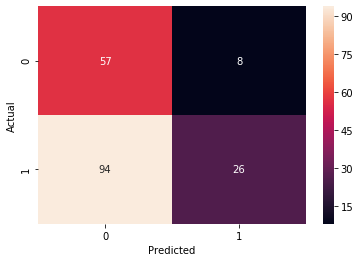

In [115]:
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')